<a href="https://colab.research.google.com/github/Raden616Rizki/PCVK_Ganjil_2023/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A. TUGAS PRAKTIKUM**

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

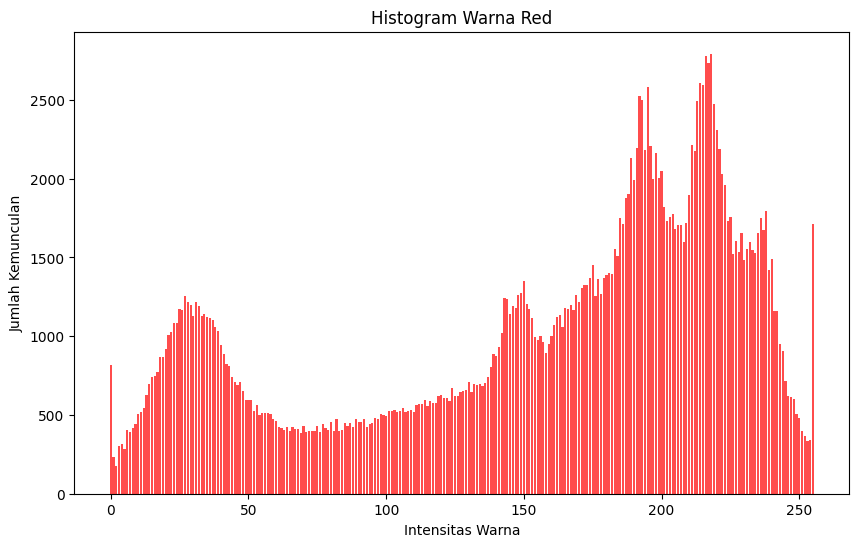

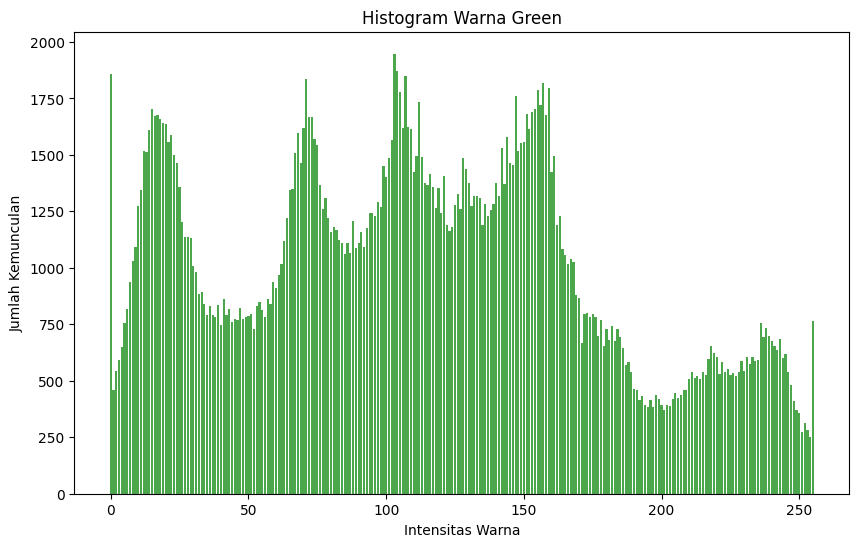

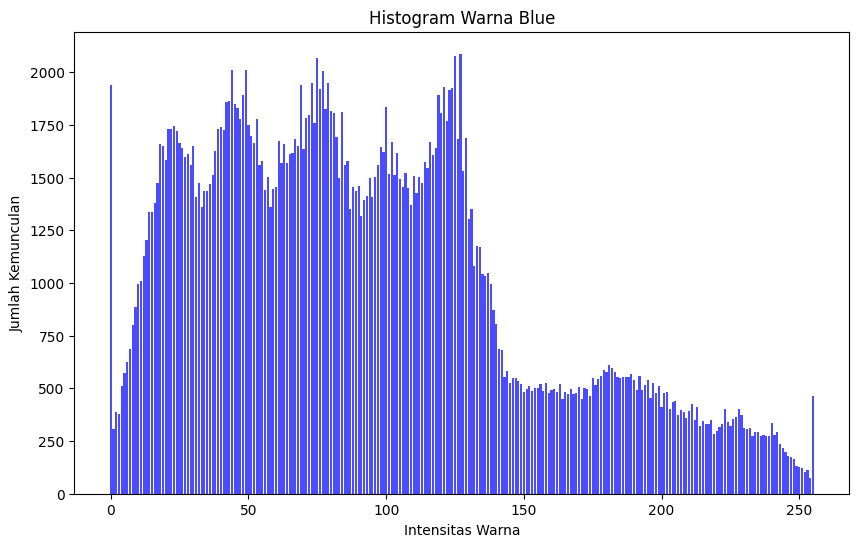

In [61]:
img = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

def hitung_pixel(image):
  red = {}
  green = {}
  blue = {}

  # Akses per pixel
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      b = int(image[y, x, 0])
      g = int(image[y, x, 1])
      r = int(image[y, x, 2])

      if r in red:
        red[r] += 1
      else:
        red[r] = 1

      if g in green:
        green[g] += 1
      else:
        green[g] = 1

      if b in blue:
        blue[b] += 1
      else:
        blue[b] = 1

  return red, green, blue

def buat_histogram(intensitas, warna):
  plt.figure(figsize=(10, 6))
  plt.bar(intensitas.keys(), intensitas.values(), color=warna.lower(), alpha=0.7)
  plt.title(f'Histogram Warna {warna.capitalize()}')
  plt.xlabel('Intensitas Warna')
  plt.ylabel('Jumlah Kemunculan')
  plt.show()

intensitas_merah, intensitas_hijau, intensitas_biru = hitung_pixel(img)
buat_histogram(intensitas_merah, 'red')
buat_histogram(intensitas_hijau, 'green')
buat_histogram(intensitas_biru, 'blue')

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

- Penggunaan numpy histogram menampilkan hasil yang sama dengan penggunaan function sebelumnya

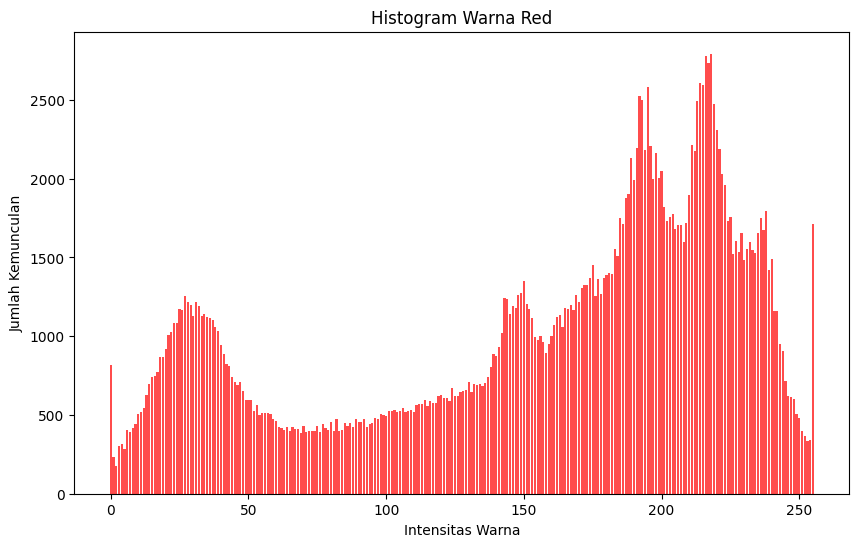

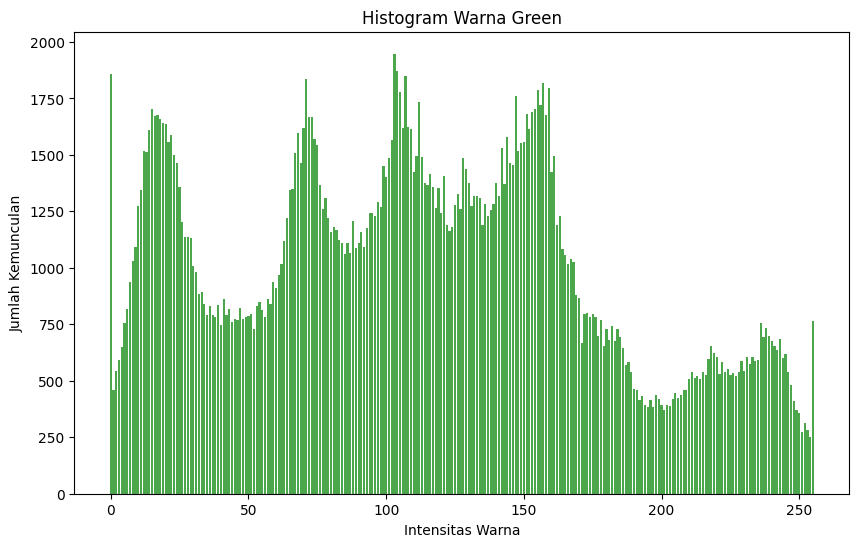

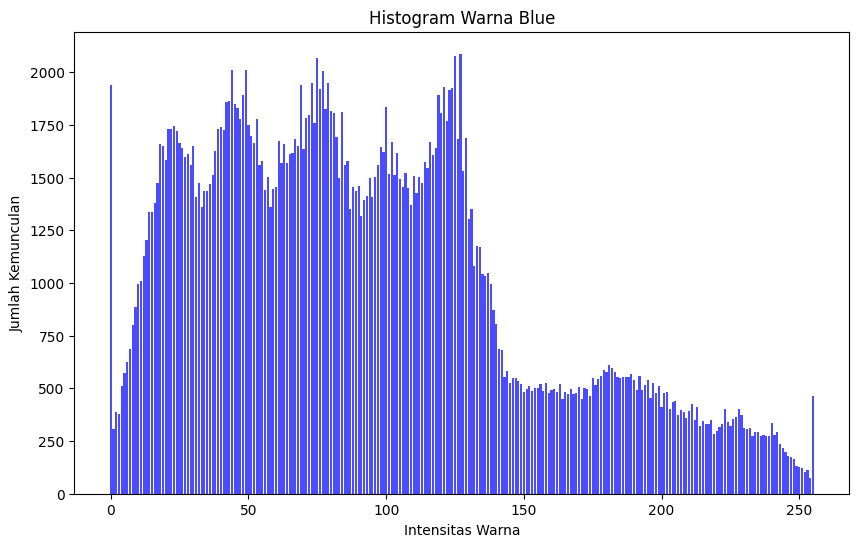

In [62]:
def numpy_histogram(intensitas, warna):
  key = list(intensitas.keys())
  value = list(intensitas.values())

  histogram = np.histogram(key, bins=range(257), weights=value)[0]

  # Menampilkan histogram
  plt.figure(figsize=(10, 6))
  plt.bar(range(256), histogram, color=warna.lower(), alpha=0.7)
  plt.title(f'Histogram Warna {warna.capitalize()}')
  plt.xlabel('Intensitas Warna')
  plt.ylabel('Jumlah Kemunculan')
  plt.show()

numpy_histogram(intensitas_merah, 'red')
numpy_histogram(intensitas_hijau, 'green')
numpy_histogram(intensitas_biru, 'blue')

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

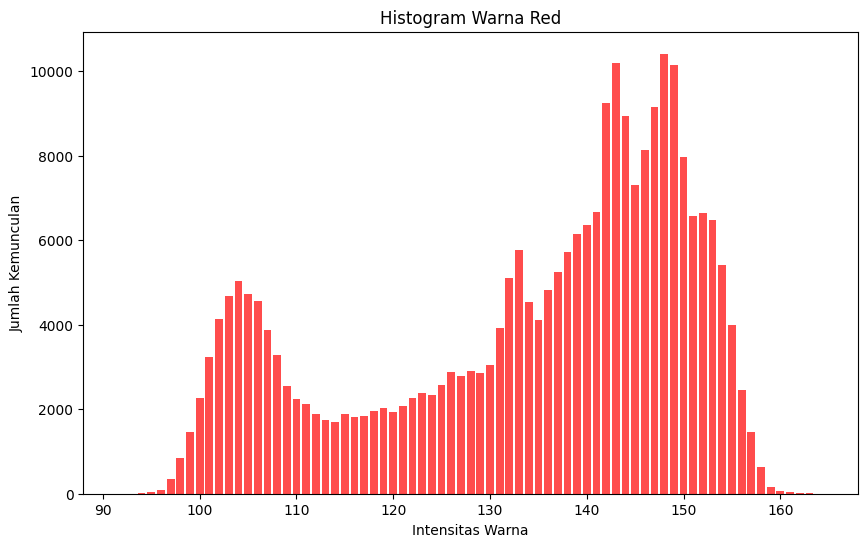

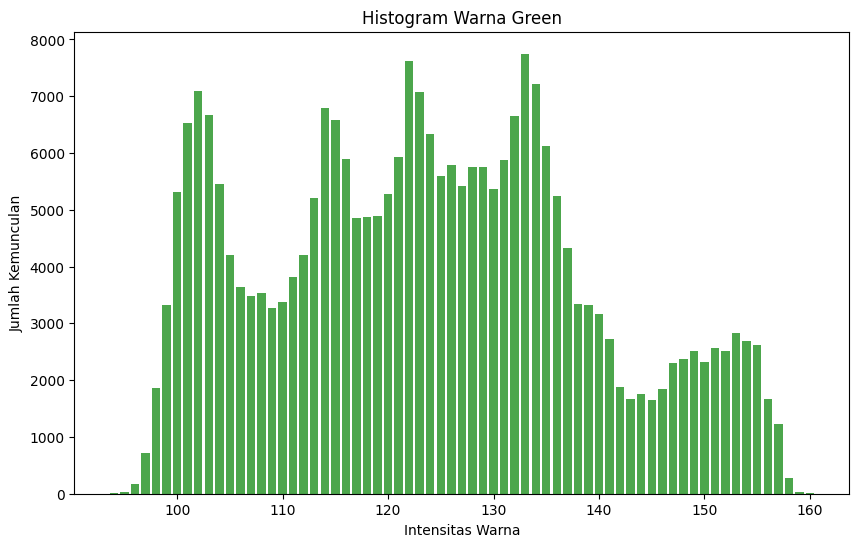

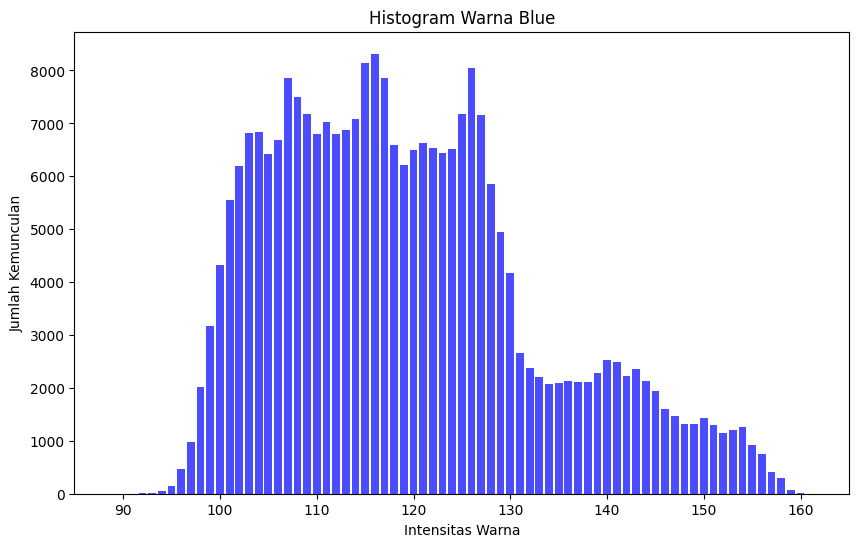

In [98]:
img2 = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

# Sebelum histogram equalization
intensitas_merah, intensitas_hijau, intensitas_biru = hitung_pixel(img2)
buat_histogram(intensitas_merah, 'red')
buat_histogram(intensitas_hijau, 'green')
buat_histogram(intensitas_biru, 'blue')

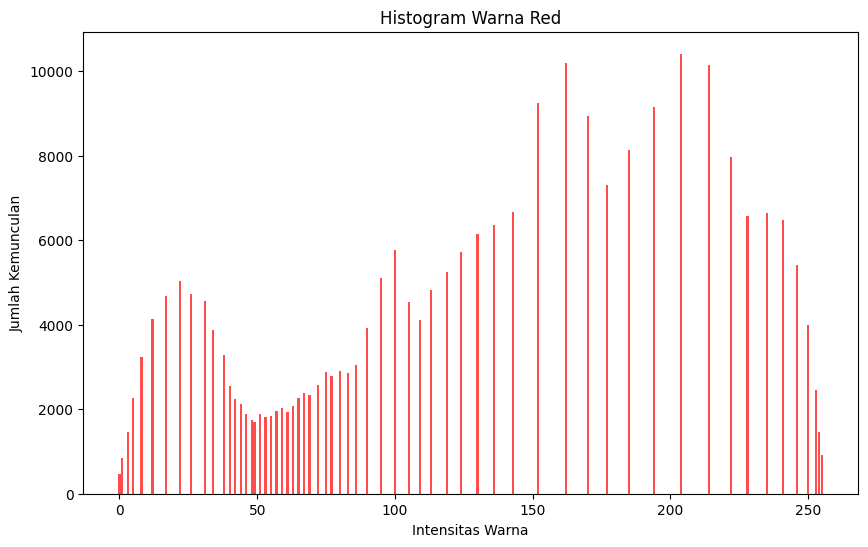

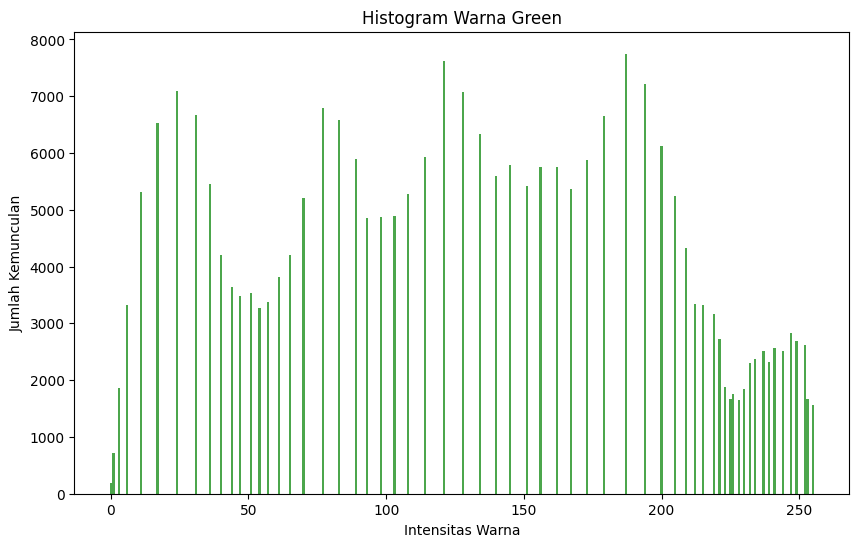

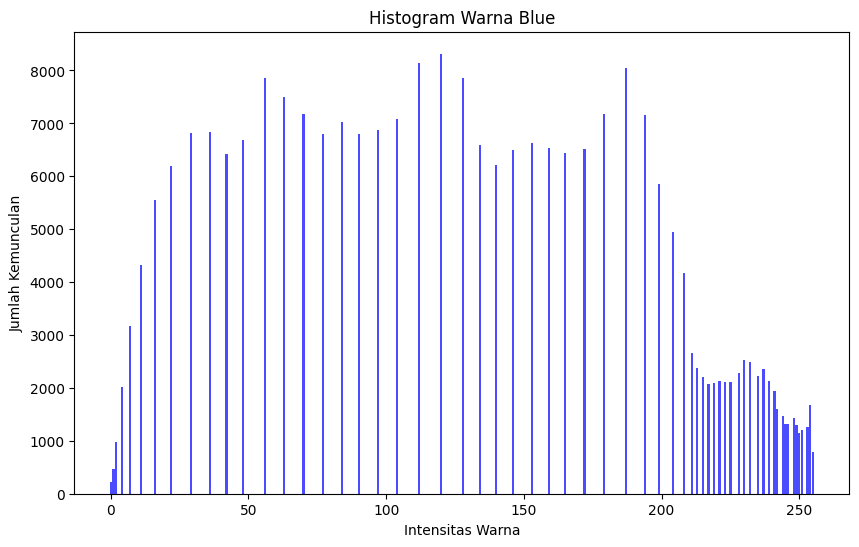

In [109]:
def histogram_equalization(image):

  # Intensitas Pixel
  intensitas_merah, intensitas_hijau, intensitas_biru = hitung_pixel(image)

  red_channel = hitung_sk(image[...,2], intensitas_merah)
  green_channel = hitung_sk(image[...,1], intensitas_hijau)
  blue_channel = hitung_sk(image[...,0], intensitas_biru)

  merged_image = cv.merge([blue_channel, green_channel, red_channel])

  return merged_image

def hitung_sk(image, list_intensitas):
  list_intensitas = dict(sorted(list_intensitas.items()))

  # l, rj dan nrj
  l = 256
  rj = list(list_intensitas.keys())
  nrj = list(list_intensitas.values())

  # K0
  k0 = []
  for i in range(len(rj)):
    if i == 0:
      k0.append(nrj[i])
    else:
      k0.append(nrj[i] + k0[i - 1])

  # Sk = round((L-1)/MAX(k0) * k0)
  sk = []
  list_pixel_baru = {}
  for i in range(len(rj)):
    k0s = (l - 1) / k0[-1] * k0[i]
    sk.append(round(k0s))

    list_pixel_baru[rj[i]] = sk[i]

  # Konversi nilai pixel
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      image[y, x] = list_pixel_baru[image[y, x]]

  return image

img3 = np.copy(img2)
equalized_img = histogram_equalization(img3)

# Sesudah histogram equalization
intensitas_merah, intensitas_hijau, intensitas_biru = hitung_pixel(equalized_img)
buat_histogram(intensitas_merah, 'red')
buat_histogram(intensitas_hijau, 'green')
buat_histogram(intensitas_biru, 'blue')

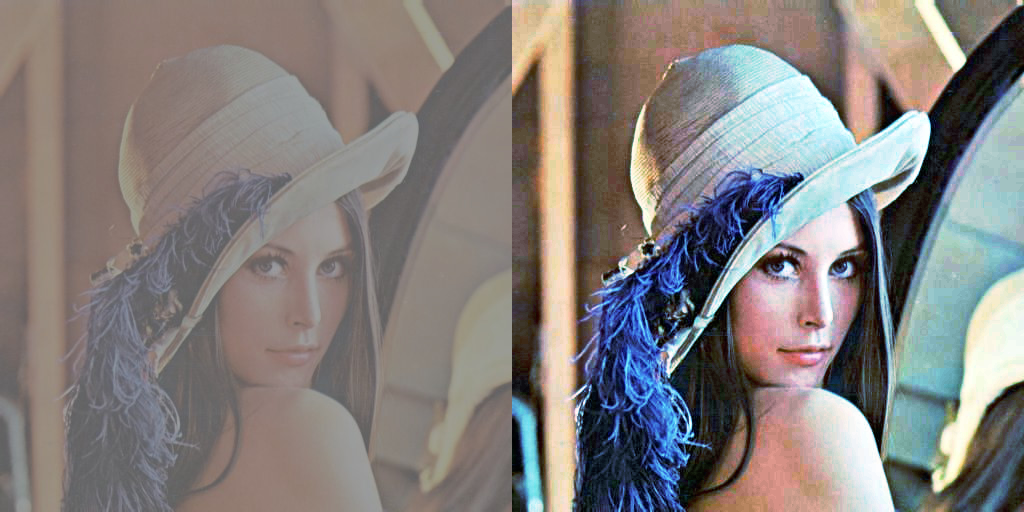

In [110]:
final_frame = cv.hconcat((img2, equalized_img))
cv2_imshow(final_frame)

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

- *EqualizeHist* pada CV2 memberikan hasil yang sama dengan menggunakan function yang dibuat diatas

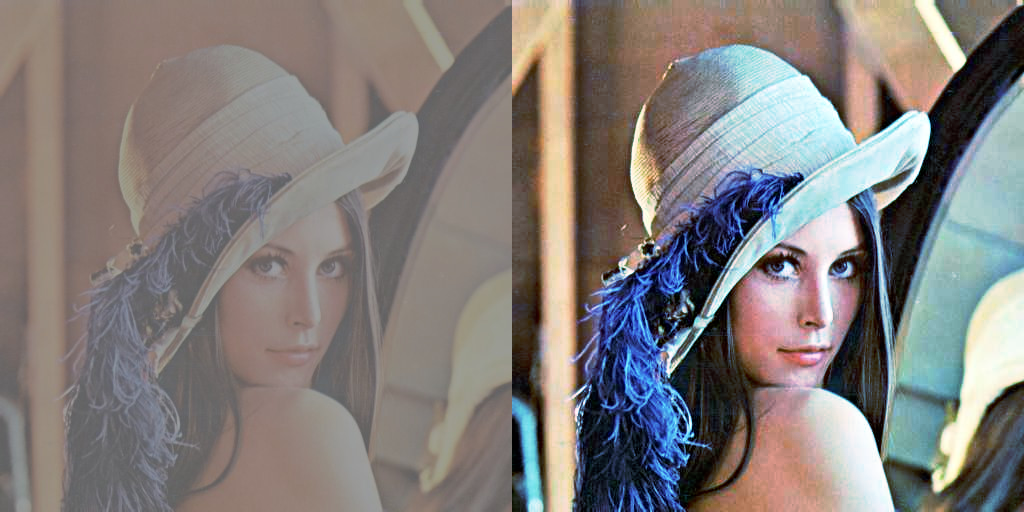

In [111]:
def use_equlizeHist(image):
  # Histogram Equalization setiap channel warna
  b, g, r = cv.split(img)
  b_eq = cv.equalizeHist(b)
  g_eq = cv.equalizeHist(g)
  r_eq = cv.equalizeHist(r)

  # Merge Channel Warna
  img_eq = cv.merge((b_eq, g_eq, r_eq))

  return img_eq

equalized_img = use_equlizeHist(img2)
final_frame = cv.hconcat((img2, equalized_img))
cv2_imshow(final_frame)

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

In [ ]:
img = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
